In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers

%matplotlib inline


train_data = pd.read_csv('titanic_dataset/train.csv')
test_data = pd.read_csv('titanic_dataset/test.csv')

train_data.head(5)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

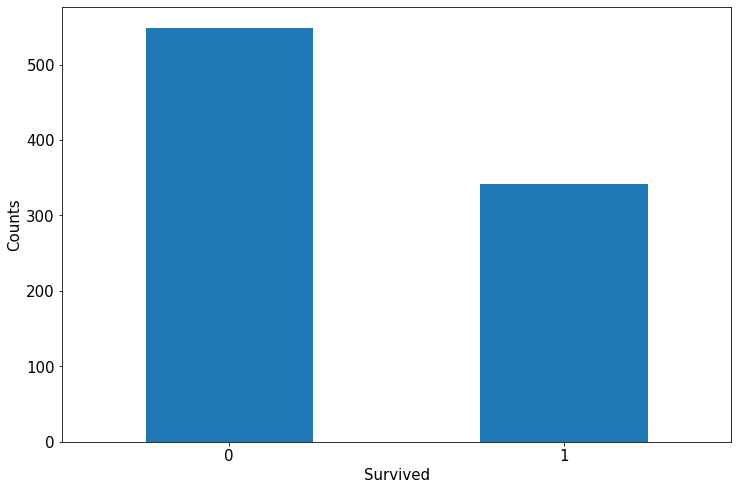

In [65]:
ax = train_data['Survived'].value_counts().plot(kind='bar', 
                                                figsize=(12, 8), 
                                                fontsize=15,
                                                rot=0)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Survived', fontsize=15)
plt.show()

Text(0.5, 0, 'Age')

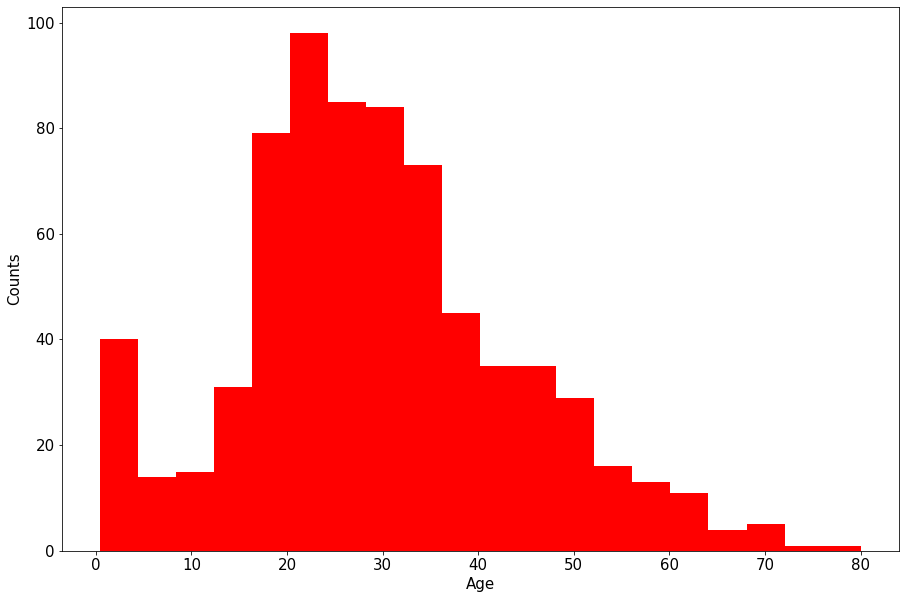

In [66]:
ax = train_data['Age'].plot(kind='hist', 
                           bins=20,
                           color='red',
                           figsize=(15, 10),
                           fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Age', fontsize=15)


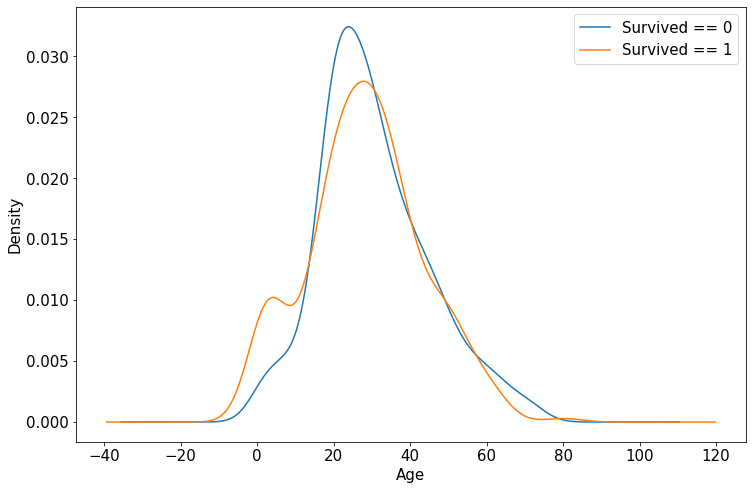

In [67]:
ax = train_data.query('Survived == 0')['Age'].plot(kind='density',
                                                   figsize=(12, 8),
                                                   fontsize=15
                                                  )
train_data.query('Survived == 1')['Age'].plot(kind='density',
                                              figsize=(12, 8),
                                              fontsize=15)
ax.legend(['Survived == 0', 'Survived == 1'], fontsize=15)
ax.set_ylabel('Density', fontsize=15)
ax.set_xlabel('Age', fontsize=15)

plt.show()

In [68]:
def PreprocessingData(data):
    result = pd.DataFrame()
    
    Pclass = pd.get_dummies(data['Pclass'])
    Pclass.columns = ['Pclass_' + str(x) for x in Pclass.columns]
    result = pd.concat([result, Pclass], axis=1)
    
    Sex = pd.get_dummies(data['Sex'])
    result = pd.concat([result, Sex], axis=1)
    
    result['Age'] = data['Age'].fillna(0)
    result['Age_null'] = pd.isna(data['Age']).astype('int32')
    
    result['SibSp'] = data['SibSp']
    result['Parch'] = data['Parch']
    result['Fare']  = data['Fare']
    
    result['Cabin_null'] = pd.isna(data['Cabin']).astype('int32')
    
    Embarked = pd.get_dummies(data['Embarked'], dummy_na=True)
    Embarked.columns = ['Embarked_' + str(x) for x in Embarked.columns]
    result = pd.concat([result, Embarked], axis=1)
    
    return (result)

In [69]:
x_train = PreprocessingData(train_data)
y_train = train_data['Survived'].values

x_test  = PreprocessingData(test_data)
y_test  = train_data['Survived'].values

print("x_train.shape = ", x_train.shape)
print("y_test.shape = ", x_test.shape)

x_train.shape =  (891, 15)
y_test.shape =  (418, 15)


In [70]:
tf.keras.backend.clear_session()

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(15, )))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [71]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['AUC'])

history = model.fit(x_train, 
                    y_train,
                    batch_size=64,
                    epochs=50,
                    validation_split=0.3
                   )


Train on 623 samples, validate on 268 samples
Epoch 1/50
623/623 [==============================] - 2s 3ms/sample - loss: 1.7165 - AUC: 0.4015 - val_loss: 1.5153 - val_AUC: 0.4903
Epoch 2/50
623/623 [==============================] - 0s 143us/sample - loss: 0.9182 - AUC: 0.5519 - val_loss: 0.8377 - val_AUC: 0.6195
Epoch 3/50
623/623 [==============================] - 0s 99us/sample - loss: 0.7143 - AUC: 0.6272 - val_loss: 0.6196 - val_AUC: 0.7128
Epoch 4/50
623/623 [==============================] - 0s 101us/sample - loss: 0.7055 - AUC: 0.6506 - val_loss: 0.5928 - val_AUC: 0.7124
Epoch 5/50
623/623 [==============================] - 0s 108us/sample - loss: 0.6685 - AUC: 0.6457 - val_loss: 0.5856 - val_AUC: 0.7143
Epoch 6/50
623/623 [==============================] - 0s 122us/sample - loss: 0.6513 - AUC: 0.6464 - val_loss: 0.5852 - val_AUC: 0.7301
Epoch 7/50
623/623 [==============================] - 0s 150us/sample - loss: 0.6402 - AUC: 0.6572 - val_loss: 0.5854 - val_AUC: 0.7255
Epoch

In [72]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics   = history.history['val_' + metric]
    epochs        = range(1, len(train_metrics) + 1)
    
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation ' + metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric)
    
    plt.legend(["train_" + metric, 'val_' + metric])
    plt.show()
    

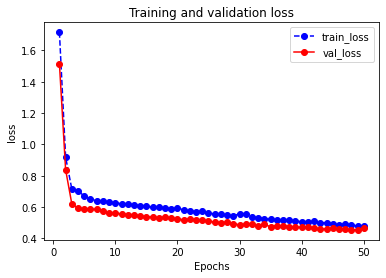

In [73]:
plot_metric(history, "loss")

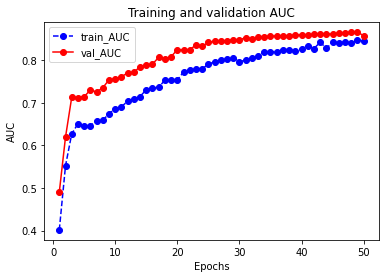

In [74]:
plot_metric(history, "AUC")

In [75]:
x_test


Pclass_1  Pclass_2  Pclass_3  female  male   Age  Age_null  SibSp  Parch  \
0           0         0         1       0     1  34.5         0      0      0   
1           0         0         1       1     0  47.0         0      1      0   
2           0         1         0       0     1  62.0         0      0      0   
3           0         0         1       0     1  27.0         0      0      0   
4           0         0         1       1     0  22.0         0      1      1   
..        ...       ...       ...     ...   ...   ...       ...    ...    ...   
413         0         0         1       0     1   0.0         1      0      0   
414         1         0         0       1     0  39.0         0      0      0   
415         0         0         1       0     1  38.5         0      0      0   
416         0         0         1       0     1   0.0         1      0      0   
417         0         0         1       0     1   0.0         1      1      1   

         Fare  Cabin_null  Embarked_C  Embarked_Q  Embarked_S  Embarked_nan  
0      7.8292           1           0           1           0             0  
1      7.0000           1           0           0           1             0  
2      9.6875           1           0           1           0             0  
3      8.6625           1           0           0           1             0  
4     12.2875           1           0           0           1             0  
..        ...         ...         ...         ...         ...           ...  
413    8.0500           1           0           0           1             0  
414  108.9000           0           1           0           0             0  
415    7.2500           1           0           0           1             0  
416    8.0500           1           0           0           1             0  
417   22.3583           1           1           0           0             0  

[418 rows x 15 columns]

In [76]:
y_test

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [77]:
model.predict(x_test[0:10])

array([[0.18753807],
       [0.21474947],
       [0.12334569],
       [0.1760934 ],
       [0.5163013 ],
       [0.24881694],
       [0.44022375],
       [0.45349076],
       [0.5553032 ],
       [0.2574768 ]], dtype=float32)

In [78]:
model.predict_classes(x_test[0:10])

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [81]:
json_str = model.to_json()
model_json = models.model_from_json(json_str)

In [82]:
model.save_weights('data/keras_model_weight.h5')


In [86]:
model_json = models.model_from_json(json_str)
model_json.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['AUC']
)


model_json.load_weights('data/keras_model_weight.h5')
